In [1]:
# Importing the necesarry libararies.
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Reading the air passenger trafiic data of Helsinki-Vantaa airport.
data = pd.read_csv("Airport_Data.csv")

In [3]:
# Printing the data to check.
data

,One,Arrival_passengers,Departure_passengers,Transfer_passengers,Domestic_Total,Arrival_passengers.1,Departure_passengers.1,Transfer_passengers.1,International_Total,Arrival_passengers.2,Departure_passengers.2,Transfer_passengers.2
0,1998,1456108,1123557,320480,2900145,3224146,2627498,603391,6455035,4680254,3751055,923871
1,1999,1408403,1066651,328073,2803127,3349174,2784964,629423,6763561,4757577,3851615,957496
2,2000,1526521,1177639,338771,3042931,3443903,2875106,648014,6967023,4970424,4052745,986785
3,2001,1503504,1144497,351671,2999672,3496334,2897584,637328,7031246,4999838,4042081,988999
4,2002,1377683,1018679,351500,2747862,3378228,2799241,684556,6862025,4755911,3817920,1036056
5,2003,1347755,1000030,336833,2684618,3479250,2858562,688490,7026302,4827005,3858592,1025323
6,2004,1427620,1055904,353328,2836852,3918357,3110974,863763,7893094,5345977,4166878,1217091
7,2005,1407192,1036092,361020,2804304,4157212,3228850,942829,8328891,5564404,4264942,1303849
8,2006,1474137,1061749,391741,2927627,4578600,3533799,1107755,9220154,6052737,4595548,1499496
9,2007,1445258,1030566,399472,2875296,5118611,3787847,1359868,10266326,6563869,4818413,1759340


In [4]:
# Checking the shape of the data.
data.shape

(24, 12)

In [5]:
# Processing the data.
# - Droping not needed collums.
data.drop(["Arrival_passengers", "Departure_passengers", "Transfer_passengers"], axis = 1, inplace = True)
data.drop(["Arrival_passengers.1", "Departure_passengers.1", "Transfer_passengers.1"], axis = 1, inplace = True)
data.drop(["Arrival_passengers.2", "Departure_passengers.2", "Transfer_passengers.2"], axis = 1, inplace = True)

# - Renaming the collum.
data.rename({"One" : "years"}, axis = 1, inplace = True)

In [6]:
# Printing the data.
data

,years,Domestic_Total,International_Total
0,1998,2900145,6455035
1,1999,2803127,6763561
2,2000,3042931,6967023
3,2001,2999672,7031246
4,2002,2747862,6862025
5,2003,2684618,7026302
6,2004,2836852,7893094
7,2005,2804304,8328891
8,2006,2927627,9220154
9,2007,2875296,10266326


In [7]:
# Adding the "Domestic_Total" and "International_Total" collums to get a total number of passengers.
collum_list = ["Domestic_Total", "International_Total"]
# Naming the new collum "final_total"
data["final_total"] = data[collum_list].sum(axis = 1)

In [8]:
first_cut = range(0, 21, 1)
second_cut = range(22, 23, 1)
guess_row = data.drop(first_cut, axis = 0)
guess_row.drop([22, 23], axis = 0, inplace = True)

In [9]:
guess_row

,years,Domestic_Total,International_Total,final_total
21,2019,2929779,18931303,21861082


In [10]:
data.drop(["Domestic_Total", "International_Total"], axis = 1, inplace = True)
data.drop([21, 22, 23], axis = 0, inplace = True)
guess_row.drop(["Domestic_Total", "International_Total"], axis = 1, inplace = True)

In [11]:
data

,years,final_total
0,1998,9355180
1,1999,9566688
2,2000,10009954
3,2001,10030918
4,2002,9609887
5,2003,9710920
6,2004,10729946
7,2005,11133195
8,2006,12147781
9,2007,13141622


In [12]:
guess_row

,years,final_total
21,2019,21861082


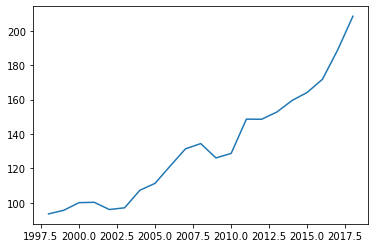

In [13]:
plt.plot(data.years, data.final_total / 10**5)

In [14]:
# Store the data in the form of dependent and independent variables separately
X = data.iloc[:, 0:1].values 
y = data.iloc[:, 1].values 

In [15]:
# Fiting the Simple Linear Regression Model
LinReg = LinearRegression()
LinReg.fit(X, y)

LinearRegression()

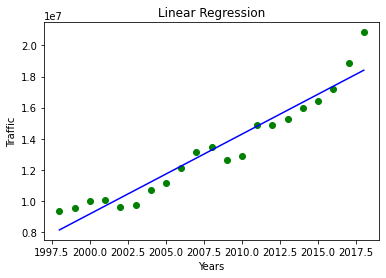

In [16]:
# Visualise the Linear Regression Result
plt.scatter(X, y, color = "green") 
  
plt.plot(X, LinReg.predict(X), color = "blue") 
plt.title("Linear Regression") 
plt.xlabel("Years") 
plt.ylabel("Traffic") 
  
plt.show() 

In [17]:
# Add the polynomial term to the equation/model
# degree = [2, 5, 10, 50]
poly = PolynomialFeatures(degree = 5) 
X_poly = poly.fit_transform(X)

In [18]:
# Fit the Polynomial Regression Model 
PolyReg = LinearRegression() 
PolyReg.fit(X_poly, y) 

LinearRegression()

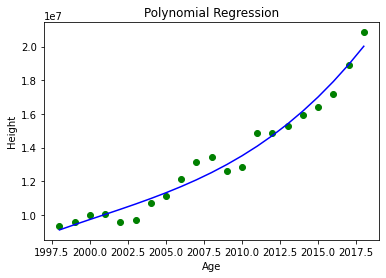

In [19]:
# Visualise the Polynomial Regression Results 
plt.scatter(X, y, color = "green") 
  
plt.plot(X, PolyReg.predict(poly.fit_transform(X)), color = "blue") 
plt.title("Polynomial Regression") 
plt.xlabel("Age") 
plt.ylabel("Height") 
  
plt.show() 

In [20]:
# Predicted Height from test dataset w.r.t Simple Linear Regression
y_predict_slr = LinReg.predict(X)

# Model Evaluation using R-Square for Simple Linear Regression
from sklearn import metrics
r_square = metrics.r2_score(y, y_predict_slr)
print('R-Square Error associated with Simple Linear Regression:', r_square)

R-Square Error associated with Simple Linear Regression: 0.9245471407616122


In [21]:
# Predicted Height from test dataset w.r.t Polynomial Regression
y_predict_pr = PolyReg.predict(poly.fit_transform(X))

# Model Evaluation using R-Square for Polynomial Regression
from sklearn import metrics
r_square = metrics.r2_score(y, y_predict_pr)
print('R-Square Error associated with Polynomial Regression is:', r_square)

R-Square Error associated with Polynomial Regression is: 0.9696228516299588


In [22]:
# Predicting Triffic based on year using Linear Regression 
LinReg.predict([[2019]]) 

array([18919817.83333337])

In [23]:
guess = guess_row.final_total.values
guess

array([21861082])

In [24]:
# Predicting Triffic based on year using Polynomial Regression 
PolyReg.predict(poly.fit_transform([[2019]])) 

array([21205795.13037109])

In [25]:
guess

array([21861082])